In [1]:
import numpy as np
import tensorflow as tf
from image_utils import image_from_url
from lstm import MaxLikelihoodLSTM, PolicyGradientLSTM
from data import PGData, COCOData

In [2]:
def initialize_uninitialized(sess):
    ruv = set(sess.run(tf.report_uninitialized_variables()))
    uv = [v for v in tf.global_variables() if v.name.split(':')[0].encode('ascii') in ruv]
    tf.variables_initializer(uv).run()

In [3]:
mledata = COCOData()
pgdata = PGData()

In [4]:
lstm = MaxLikelihoodLSTM(tf.constant(mledata.word_embedding, dtype=tf.float32), learning_rate=5e-3, batch_size=100)
lstm.build_model()

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

tf.reset_default_graph()
sess.close()

In [5]:
sess = tf.InteractiveSession()
lstm = PolicyGradientLSTM(tf.constant(pgdata.word_embedding, dtype=tf.float32), learning_rate=5e-4, batch_size=100)

lstm.load_model(sess, "models/mle20")
initialize_uninitialized(sess)

INFO:tensorflow:Restoring parameters from models/mle20


In [6]:
captions = []
probs = []
indexes = []
rewards = []

In [10]:
for i in range(1):
    caption, prob, index, reward = lstm.train(sess, pgdata)
    pgdata.shuffle()
    print(np.mean(reward))
    print("------------")
    captions.extend(caption)
    probs.extend(prob)
    indexes.extend(index)
    rewards.extend(reward)

0.970317927365
------------


In [12]:
probs

[6.7919143772098773e-18,
 2.3484262262105167e-13,
 4.8896974728754362e-14,
 7.4730770627980502e-13,
 7.9859184987754594e-21,
 1.4383394445610477e-15,
 3.8797397615435021e-15,
 4.3890702553993027e-13,
 1.6222335540928756e-14,
 5.8433455209057957e-20,
 7.1005890584288443e-27,
 1.7695544480522769e-18,
 2.3111656808846983e-19,
 3.0919886187547983e-13,
 9.4813969436905772e-19,
 6.6211097551006627e-15,
 2.9953032121551384e-14,
 3.2607058498723657e-14,
 6.2220082728445169e-20,
 1.7449048501893558e-18,
 9.2145881422725517e-20,
 1.5442220002294093e-13,
 6.7351678511591466e-16,
 1.6310332164271611e-13,
 1.0754416242144591e-10,
 6.1872368055381225e-14,
 2.7146422462835547e-10,
 1.2435358133658161e-10,
 9.0565657127040648e-12,
 1.6581973021700927e-16,
 7.2752104569980358e-14,
 1.4966079080307106e-16,
 6.1396081024205484e-21,
 1.6969989104740099e-18,
 7.2102177399963368e-14,
 6.4896340728029903e-13,
 5.9732323715913073e-17,
 7.5050002209728362e-22,
 3.0169411122657283e-16,
 3.8310154284899312e-21,


In [7]:
tf.reset_default_graph()
sess.close()

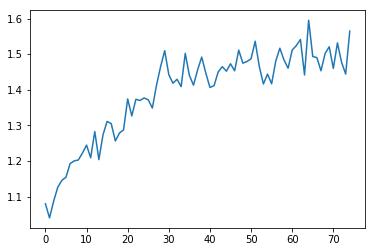

In [18]:
import matplotlib.pyplot as plt

rewards_arr = np.array(rewards)
plt.plot(np.mean(np.reshape(rewards_arr[:, -1], (75, 100)), axis=1))
# plt.plot(rewards_arr[:, -1])
plt.show()

In [21]:
from pyciderevalcap.eval import CIDErEvalCap as ciderEval
cand_list, ref = [], {}
for i in range(1000, 2000):
    idx = str(i)
    ref[idx]  = pgdata.data['train_image_idx_to_captions'][idx][0:-1]
    cand_list.append({'image_id': idx, 'caption': pgdata.data['train_image_idx_to_captions'][idx][-1]['caption']})

scorer = ciderEval(ref, cand_list, "coco-val-df")
scores = scorer.evaluate()

In [22]:
np.mean(scores)

1.7911916746177574